# Importações Necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Lendo o dataset

In [2]:
df_format = pd.read_excel('./Bases/Base_capping.xlsx')
df_sujos = pd.read_excel('./Base_suja.xlsx')

In [3]:
display(df_format.sample(5))

UF  Porte Empresa  Capital Social        municipios  \
10522  SE  Não Informado             1.0           ARACAJU   
10119  RJ  Não Informado             5.0     VOLTA REDONDA   
9738   RJ  Não Informado             5.0       BARRA MANSA   
12483  RJ  Não Informado             5.0       TERESOPOLIS   
8911   BA  Não Informado             1.0  FEIRA DE SANTANA   

                                                   cnaes  \
10522  Padaria e confeitaria com predominância de rev...   
10119    Lanchonetes, casas de chá, de sucos e similares   
9738   Lojas de departamentos ou magazines, exceto lo...   
12483  Atividades de atendimento hospitalar, exceto p...   
8911   Comércio varejista de artigos do vestuário e a...   

             Natureza Juridica  ano inicio_ativ  mes inicio_ativ  \
10522  Empresário (Individual)             1991               11   
10119  Empresário (Individual)             1988                9   
9738   Empresário (Individual)             1991                1   
12483       Associação Privada             1968                9   
8911   Empresário (Individual)             1989                7   

       dia inicio_ativ Status Operacional  
10522               12              Ativa  
10119                8              Ativa  
9738                25              Ativa  
12483               18          Encerrada  
8911                 5          Irregular

## Vereficando a natureza dos dados

In [4]:
print(df_format.columns)

Index(['UF', 'Porte Empresa', 'Capital Social', 'municipios', 'cnaes',
       'Natureza Juridica', 'ano inicio_ativ', 'mes inicio_ativ',
       'dia inicio_ativ', 'Status Operacional'],
      dtype='object')


In [5]:
print(df_format.dtypes)

UF                     object
Porte Empresa          object
Capital Social        float64
municipios             object
cnaes                  object
Natureza Juridica      object
ano inicio_ativ         int64
mes inicio_ativ         int64
dia inicio_ativ         int64
Status Operacional     object
dtype: object


In [6]:
print("Data Types Columns:\n",df_format.dtypes)

print("Resumo estatístico:\n", df_format.describe())

Data Types Columns:
 UF                     object
Porte Empresa          object
Capital Social        float64
municipios             object
cnaes                  object
Natureza Juridica      object
ano inicio_ativ         int64
mes inicio_ativ         int64
dia inicio_ativ         int64
Status Operacional     object
dtype: object
Resumo estatístico:
        Capital Social  ano inicio_ativ  mes inicio_ativ  dia inicio_ativ
count    13435.000000     13435.000000     13435.000000     13435.000000
mean      4264.666429      1988.562858         6.370674        15.549981
std      35093.384939         7.092026         3.240888         8.945891
min          0.000000      1929.000000         1.000000         1.000000
25%          1.000000      1989.000000         4.000000         8.000000
50%          5.000000      1989.000000         6.000000        16.000000
75%          5.000000      1991.000000         9.000000        23.000000
max     400000.000000      2014.000000        12.000000     

## Plotagem de gráficos dados Sujos e Limpos (Para substituir o dashboard BI)

### Sujo

In [7]:
# Calculando a quantidade de empresas abertas por ano
df_ano = df_sujos.groupby('ano inicio_ativ').size().reset_index(name='Quantidade de Empresas')

# Gráfico 1: Evolução Temporal de Abertura de Empresas por Ano
fig1 = px.line(df_ano, 
               x='ano inicio_ativ', 
               y='Quantidade de Empresas', 
               title='Evolução Temporal de Abertura de Empresas por Ano',
               labels={'ano inicio_ativ': 'Ano de Início de Atividade', 'Quantidade de Empresas': 'Quantidade de Empresas'})

fig1.show()

### Limpo

In [8]:
# Calculando a quantidade de empresas abertas por ano
df_ano = df_format.groupby('ano inicio_ativ').size().reset_index(name='Quantidade de Empresas')

# Gráfico 1: Evolução Temporal de Abertura de Empresas por Ano
fig1 = px.line(df_ano, 
               x='ano inicio_ativ', 
               y='Quantidade de Empresas', 
               title='Evolução Temporal de Abertura de Empresas por Ano',
               labels={'ano inicio_ativ': 'Ano de Início de Atividade', 'Quantidade de Empresas': 'Quantidade de Empresas'})

fig1.show()

### Conclusão:

Nos dados brutos, a evolução temporal de abertura de empresas apresenta um padrão peculiar, com um pico abrupto em 1989, seguido por uma queda significativa. Esse comportamento pode estar associado a influências externas, como eventos econômicos ou políticos que impactaram a base de dados.

  Como nossa tratativa mexeu mais com a coluna Y (Situação Cadastral/Status Operacional) e Capital social, não conseguimos observar diferenças entre o gráfico antes da tratativa e depois da tratativa

### Sujo

In [9]:
# Gráfico 2: Distribuição de Empresas por Porte

fig2 = px.bar(df_sujos, 
              y='Porte Empresa', 
              title='Distribuição de Empresas por Porte',
              labels={'Porte Empresa': 'Porte de Empresa'},
              orientation='h')  # Gráfico horizontal

# Ajustes simples:
fig2.update_layout(
    template='plotly_white',           # Tema claro
    xaxis_title='Quantidade',          # Rótulo simplificado do eixo X
    bargap=0.2                         # Maior espaçamento entre barras
)

# Remove a borda nas barras e ajusta a opacidade
fig2.update_traces(marker=dict(line=dict(width=0)), opacity=0.9)

fig2.show()

### Limpo

In [10]:
# Gráfico 2: Distribuição de Empresas por Porte

fig2 = px.bar(df_format, 
              y='Porte Empresa', 
              title='Distribuição de Empresas por Porte',
              labels={'Porte Empresa': 'Porte de Empresa'},
              orientation='h')  # Gráfico horizontal

# Ajustes simples:
fig2.update_layout(
    template='plotly_white',           # Tema claro
    xaxis_title='Quantidade',          # Rótulo simplificado do eixo X
    bargap=0.2                         # Maior espaçamento entre barras
)

# Remove a borda nas barras e ajusta a opacidade
fig2.update_traces(marker=dict(line=dict(width=0)), opacity=0.9)

fig2.show()

### Conclusão:

O gráfico mostra que a maioria das empresas está classificada como "Não Informado", o que revela uma quantidade significativa de registros sem especificação para o porte. Além disso, há uma presença relevante de categorias como "Outros" e "Micro Empresa". Por isso, seria interessante realizar um tratamento adequado dos dados para melhorar a clareza e precisão na análise do porte das empresas.

Como nossa tratativa mexeu mais com a coluna Y (Situação Cadastral/Status Operacional) e Capital social, não conseguimos observar diferenças entre o gráfico antes da tratativa e depois da tratativa

### Sujo

In [11]:
df_situacao_uf = df_sujos.groupby(['UF', 'Situação Cadastral']).size().reset_index(name='Quantidade de Empresas')

# Gráfico 3: Gráfico de barras: Quantidade de empresas por Situação Cadastral e Estado
fig3 = px.bar(df_situacao_uf, 
             x='UF', 
             y='Quantidade de Empresas', 
             color='Situação Cadastral', 
             title='Quantidade de Empresas por Situação Cadastral e Estado',
             labels={'UF': 'Estado', 'Quantidade de Empresas': 'Quantidade de Empresas'},
             barmode='group')  # Agrupando barras por situação cadastral

fig3.show()

### Limpo

In [12]:
#ff
df_situacao_uf = df_format.groupby(['UF', 'Status Operacional']).size().reset_index(name='Quantidade de Empresas')

# Gráfico 3: Gráfico de barras: Quantidade de empresas por Situação Cadastral e Estado
fig3 = px.bar(df_situacao_uf, 
             x='UF', 
             y='Quantidade de Empresas', 
             color='Status Operacional', 
             title='Quantidade de Empresas por Situação Cadastral e Estado',
             labels={'UF': 'Estado', 'Quantidade de Empresas': 'Quantidade de Empresas'},
             barmode='group')  # Agrupando barras por situação cadastral

fig3.show()


### Conclusão:

No gráfico original, observamos uma predominância de empresas "Ativas" nos estados do Paraná (PR), São Paulo (SP) e Bahia (BA), enquanto estados como Amazonas (AM) e Roraima (RR) apresentam um número significativamente menor de registros. Além disso, as categorias de empresas em situações "Inapta" e "Baixada" indicam a existência de um volume relevante de empresas desativadas.

Após a limpeza, reorganizamos as categorias, agrupando-as em "Ativas", "Irregulares" (empresas suspensas e inaptas) e "Encerradas" (empresas nulas e baixadas). Essa nova organização proporcionou uma visão mais clara da distribuição das empresas entre os estados, tornando a análise mais precisa e confiável ao evitar distorções causadas por registros inconsistentes.

### Sujo

In [13]:
# Gráfico 4: Distribuição do Porte das Empresas por Estado

fig4 = px.bar(df_sujos, 
              x='UF', 
              color='Porte Empresa', 
              title='Distribuição do Porte das Empresas por Estado',
              labels={'UF': 'Estado', 'Porte Empresa': 'Porte da Empresa'},
              barmode='group')

# Ajustes simples:
fig4.update_layout(
    template='plotly_white',           # Tema claro
    xaxis_tickangle=-45,               # Inclina rótulos do eixo X
    yaxis_title='Quantidade',          # Rótulo simplificado do eixo Y
    bargap=0.2                         # Maior espaçamento entre barras
)

# Remove a borda nas barras e ajusta a opacidade
fig4.update_traces(marker=dict(line=dict(width=0)), opacity=0.9)

fig4.show()


# Limpo

In [14]:
# Gráfico 4: Distribuição do Porte das Empresas por Estado

fig4 = px.bar(df_format, 
              x='UF', 
              color='Porte Empresa', 
              title='Distribuição do Porte das Empresas por Estado',
              labels={'UF': 'Estado', 'Porte Empresa': 'Porte da Empresa'},
              barmode='group')

# Ajustes simples:
fig4.update_layout(
    template='plotly_white',           # Tema claro
    xaxis_tickangle=-45,               # Inclina rótulos do eixo X
    yaxis_title='Quantidade',          # Rótulo simplificado do eixo Y
    bargap=0.2                         # Maior espaçamento entre barras
)

# Remove a borda nas barras e ajusta a opacidade
fig4.update_traces(marker=dict(line=dict(width=0)), opacity=0.9)

fig4.show()

### Conclusão:

Nos dados sujos, observa-se uma grande quantidade de empresas classificadas como "Não Informado" em vários estados, especialmente na Bahia e no Rio de Janeiro. Isso limita a visualização completa da distribuição por porte de empresa.

Como nossa tratativa mexeu mais com a coluna Y (Situação Cadastral/Status Operacional) e Capital social, não conseguimos observar diferenças entre o gráfico antes da tratativa e depois da tratativa

### Sujo

In [ ]:
# Gráfico 5: Distribuição de Empresas por Porte (Gráfico de Pizza)

fig5 = px.pie(df_sujos, 
             names='Situação Cadastral', 
             title='Distribuição da Situação Cadastral das Empresas',
             labels={'Situação Cadastral': 'Situação Cadastral'})
fig5.show()

### Limpo

In [16]:
# Gráfico 5: Distribuição de Empresas por Porte (Gráfico de Pizza)

fig5 = px.pie(df_format, 
             names='Status Operacional', 
             title='Distribuição da Situação Cadastral das Empresas',
             labels={'Status Operacional': 'Status Operacional'})
fig5.show()

### Conclusão:

Nos dados sujos, o gráfico de pizza mostra uma predominância de empresas "Ativas", com menor representatividade nas categorias "Baixada" e "Suspensa". Essa distribuição pode sugerir a necessidade de ajustes para melhorar a consistência dos registros.

Após a limpeza, a junção das categorias resultou em uma visão mais coesa entre empresas ativas, encerradas e irregulares. Isso facilita a análise e a identificação de padrões, mostrando como a limpeza contribui para dados mais claros e confiáveis.

### Sujo

In [17]:
# Gráfico 6: Capital Social por Ano de Início de Atividade

fig6 = px.scatter(df_sujos, 
                  x='ano inicio_ativ', 
                  y='Capital Social', 
                  color='Porte Empresa', 
                  title='Capital Social por Ano de Início de Atividade',
                  labels={'ano inicio_ativ': 'Ano de Início de Atividade', 'Capital Social': 'Capital Social'},
                  trendline='ols')  # Opcional, para adicionar uma linha de tendência
fig6.show()

### Limpo

In [18]:
# Gráfico 6: Capital Social por Ano de Início de Atividade

fig6 = px.scatter(df_format, 
                  x='ano inicio_ativ', 
                  y='Capital Social', 
                  color='Porte Empresa', 
                  title='Capital Social por Ano de Início de Atividade',
                  labels={'ano inicio_ativ': 'Ano de Início de Atividade', 'Capital Social': 'Capital Social'},
                  trendline='ols')  # Opcional, para adicionar uma linha de tendência
fig6.show()

### Conclusão:

Vemos no gráfico que nas decadas mais antigas, o capital social das MEIs e MEs eram baixissimos, mas a partir dos anos 70 esses valores começaram a crescer consideravelmente, também podemos analisar que existem possíveis outliers artificiais, pois não é possivel que uma ME(Micro Empresa) tenha 52 Bilhões de capital social

Após a Limpeza, vemos claramente dados mais bem distribuidos e mais realistas

### Sujo

In [19]:
# Gráfico 7: Capital Social por Porte de Empresa

fig7 = px.box(df_sujos, 
             x='Porte Empresa', 
             y='Capital Social', 
             title='Capital Social por Porte de Empresa',
             labels={'Porte Empresa': 'Porte de Empresa', 'Capital Social': 'Capital Social (R$)'})
fig7.show()

### Limpo

In [20]:
# Gráfico 7: Capital Social por Porte de Empresa

fig7 = px.box(df_format, 
             x='Porte Empresa', 
             y='Capital Social', 
             title='Capital Social por Porte de Empresa',
             labels={'Porte Empresa': 'Porte de Empresa', 'Capital Social': 'Capital Social (R$)'})
fig7.show()

### Conclusão:

Continuando com a análise de outliers do gráfico passado podemos ver mais claramente os valores absurdos (bilhões de reais) que algumas MEIs e MEs tem de capital social, o que são outliers que devem ser tratados.

Após a limpeza vemos que a base ainda tem outliers consideraveis, mas são muito menos outliers em questão de quantidade e são valores mais realistas

### Sujo

In [21]:
fig8 = px.bar(df_sujos.groupby('UF').mean(numeric_only=True).reset_index(),
                            x='UF', 
                            y='Capital Social', 
                            title='Média do Capital Social por Estado (UF)',
                            labels={'Capital Social': 'Capital Social Médio (R$)', 'UF': 'Estado'})

# Ajustes de layout
fig8.update_layout(
    template='plotly_white',           # Tema claro
    yaxis_title='Capital Social Médio (R$)',  # Rótulo do eixo Y
    xaxis_title='Estado (UF)',              # Rótulo do eixo X
    xaxis={'categoryorder': 'total descending'},  # Ordenação decrescente
)

fig8.show()

### Limpo

In [22]:
fig8 = px.bar(df_format.groupby('UF').mean(numeric_only=True).reset_index(),
                            x='UF', 
                            y='Capital Social', 
                            title='Média do Capital Social por Estado (UF)',
                            labels={'Capital Social': 'Capital Social Médio (R$)', 'UF': 'Estado'})

# Ajustes de layout
fig8.update_layout(
    template='plotly_white',           # Tema claro
    yaxis_title='Capital Social Médio (R$)',  # Rótulo do eixo Y
    xaxis_title='Estado (UF)',              # Rótulo do eixo X
    xaxis={'categoryorder': 'total descending'},  # Ordenação decrescente
)

fig8.show()

### Conclusão:

Neste gráficos vemos como os outliers puxam a média de capital social de alguns estados para cima, deixando impossivel de analisar a media dos outros estados sem utilizar de um grande zoom, os demais estados que não estão entre os 6 maiores, estão com uma média de capital social, por volta de 3 a 10 mil R$, o que é bem aceitavel, mas por conta dessa média absurdo dos estados com outliers, o capital médio dos outros estados, chega até a parecer irrelevante.

Após a limpeza vemos médias de capital social mais realistas e podemos analisar que as medias de outros estados se tornam mais vizualizaveis, já que com a retirada de alguns outliers a média dos maiores estados não estão tão absurdas

### Sujo

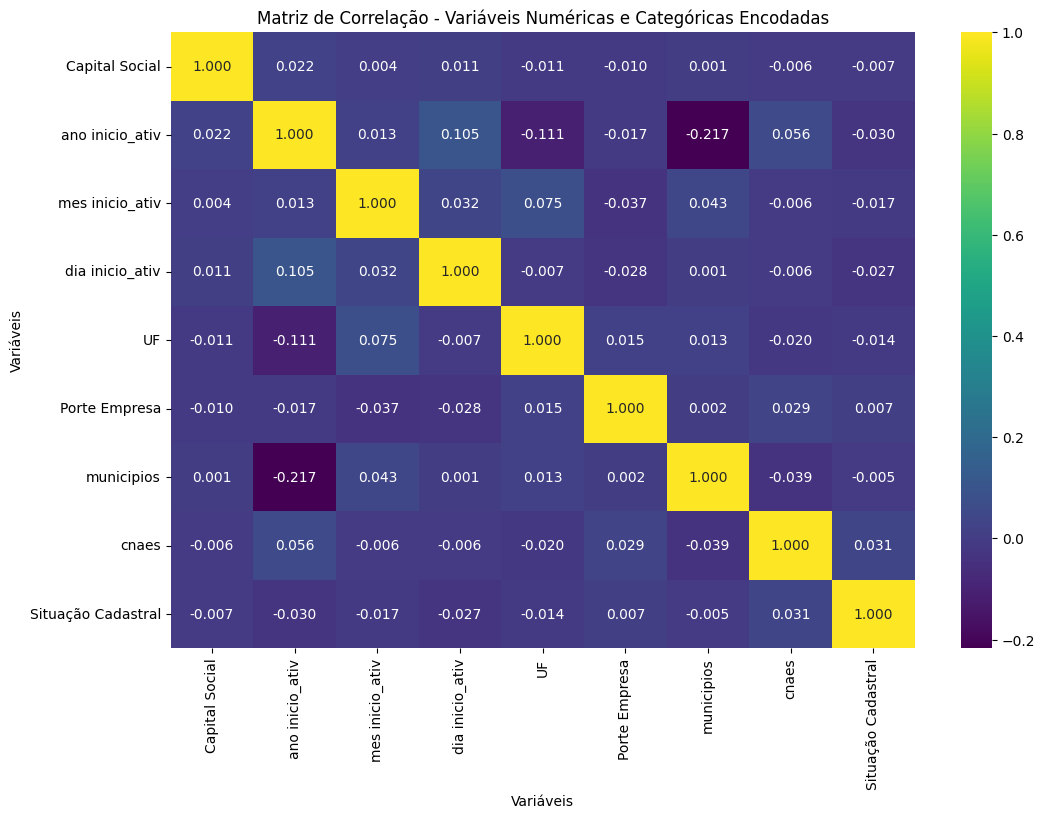

In [23]:
# Criar uma cópia do DataFrame original para evitar modificar o original
df_encoded = df_sujos.copy()

# Instanciar o LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder nas colunas categóricas
colunas_categoricas = ['UF', 'Porte Empresa', 'municipios', 'cnaes', 'Situação Cadastral']
for coluna in colunas_categoricas:
    df_encoded[coluna] = le.fit_transform(df_encoded[coluna])

# Selecionar todas as colunas (numéricas e categóricas encodadas)
df_correlacao = df_encoded[['Capital Social', 'ano inicio_ativ', 'mes inicio_ativ', 'dia inicio_ativ'] + colunas_categoricas]

# Calcular a matriz de correlação
correlacao = df_correlacao.corr()

# Plotagem da Matriz de Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, cmap='viridis', annot=True, fmt='.3f')
plt.title('Matriz de Correlação - Variáveis Numéricas e Categóricas Encodadas')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.show()

### Limpo

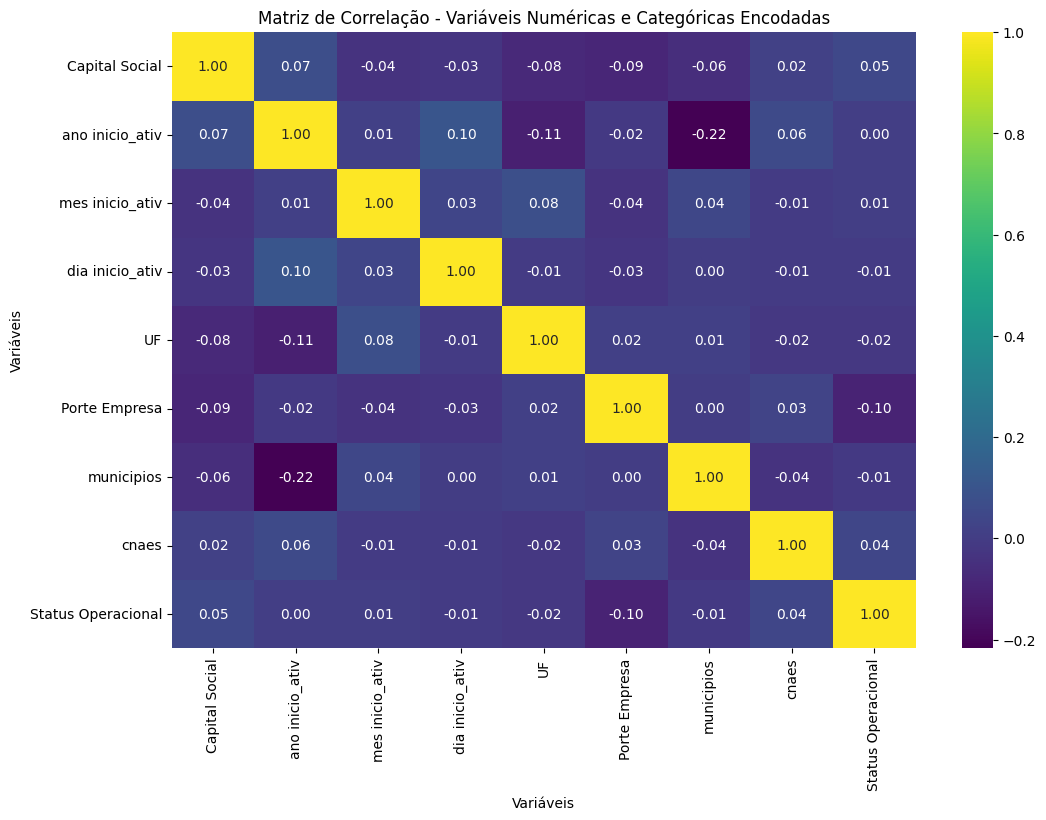

In [24]:
# Criar uma cópia do DataFrame original para evitar modificar o original
df_encoded = df_format.copy()

# Instanciar o LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder nas colunas categóricas
colunas_categoricas = ['UF', 'Porte Empresa', 'municipios', 'cnaes', 'Status Operacional']
for coluna in colunas_categoricas:
    df_encoded[coluna] = le.fit_transform(df_encoded[coluna])

# Selecionar todas as colunas (numéricas e categóricas encodadas)
df_correlacao = df_encoded[['Capital Social', 'ano inicio_ativ', 'mes inicio_ativ', 'dia inicio_ativ'] + colunas_categoricas]

# Calcular a matriz de correlação
correlacao = df_correlacao.corr()

# Plotagem da Matriz de Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, cmap='viridis', annot=True, fmt='.2f')
plt.title('Matriz de Correlação - Variáveis Numéricas e Categóricas Encodadas')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.show()

### Conclusão:

A matriz de correlação mostra que, em geral, as variáveis numéricas e categóricas encodadas apresentam correlações muito baixas entre si, a maioria próxima de 0, o que indica uma fraca relação linear entre elas. O "Capital Social" e o "Porte Empresa" têm correlação quase inexistente (-0,010), sugerindo que o porte das empresas não está fortemente relacionado ao capital social.
A única correlação um pouco mais significativa é entre "ano início de atividade" e "municípios" (-0,217), indicando uma leve tendência inversa, mas ainda assim uma correlação fraca. No geral, essa matriz sugere que as variáveis analisadas não têm relações lineares tão expressivas.

Mesmo após a limpeza, mantivemos as mesma conclusões para este gráfico

# OBS:

Nossa base já é publica, então a plotagem desses gráficos já cumpre com o requisito de plotagem dos gráfico de uma base publica. E pela dificuldade de mandar essa quantidade gigante de dados para o BI, fizemos o dashboard em python.